## Técnicas de Programação I - Numpy

Na aula de hoje iremos explorar os seguintes tópicos:

- Numpy


In [2]:
# Importando o módulo numpy
# Por conveniência utilizamos o `as` dando um "apelido" (alias) para o módulo 
# Neste caso sendo `np`
import numpy as np

#### Máscaras e condicionais

Podemos aplicar diversos operadores booleanos como:
- `>` | `>=`
- `<` | `<=`
- `==`
- `in`

In [3]:
# Para manter a reprodutibilidade utilizamos o random.seed
np.random.seed(42)
mat = np.random.normal(10, 5, (8, 4))
mat

array([[12.48357077,  9.30867849, 13.23844269, 17.61514928],
       [ 8.82923313,  8.82931522, 17.89606408, 13.83717365],
       [ 7.65262807, 12.71280022,  7.68291154,  7.67135123],
       [11.20981136,  0.43359878,  1.37541084,  7.18856235],
       [ 4.9358444 , 11.57123666,  5.45987962,  2.93848149],
       [17.32824384,  8.8711185 , 10.33764102,  2.87625907],
       [ 7.27808638, 10.55461295,  4.24503211, 11.87849009],
       [ 6.99680655,  8.54153125,  6.99146694, 19.26139092]])

In [4]:
# Qual número da nossa matriz é maior que 8
mat > 8

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False,  True, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [ True,  True,  True, False],
       [False,  True, False,  True],
       [False,  True, False,  True]])

In [5]:
# Utilizando o map seria:
mascara = lambda x: x > 8
[list(map(mascara, linha)) for linha in list(mat)]

[[True, True, True, True],
 [True, True, True, True],
 [False, True, False, False],
 [True, False, False, False],
 [False, True, False, False],
 [True, True, True, False],
 [False, True, False, True],
 [False, True, False, True]]

Obtemos uma máscara!

In [6]:
# Filtrando apenas os verdadeiros utilizando a mascara
mascara = mat > 8
print('mascara')
print(mascara)
print('-'*32)
print(mat[mascara])


mascara
[[ True  True  True  True]
 [ True  True  True  True]
 [False  True False False]
 [ True False False False]
 [False  True False False]
 [ True  True  True False]
 [False  True False  True]
 [False  True False  True]]
--------------------------------
[12.48357077  9.30867849 13.23844269 17.61514928  8.82923313  8.82931522
 17.89606408 13.83717365 12.71280022 11.20981136 11.57123666 17.32824384
  8.8711185  10.33764102 10.55461295 11.87849009  8.54153125 19.26139092]


In [7]:
# Utilizando a negação com `~` ou seja
# seria igual a mat <= 8
print((~mascara))
print('-'*32)
print(mat[~mascara])
print('-'*32)
print(mat[ mat <= 8 ])

[[False False False False]
 [False False False False]
 [ True False  True  True]
 [False  True  True  True]
 [ True False  True  True]
 [False False False  True]
 [ True False  True False]
 [ True False  True False]]
--------------------------------
[7.65262807 7.68291154 7.67135123 0.43359878 1.37541084 7.18856235
 4.9358444  5.45987962 2.93848149 2.87625907 7.27808638 4.24503211
 6.99680655 6.99146694]
--------------------------------
[7.65262807 7.68291154 7.67135123 0.43359878 1.37541084 7.18856235
 4.9358444  5.45987962 2.93848149 2.87625907 7.27808638 4.24503211
 6.99680655 6.99146694]


Podemos utilizar as operações `any` e `all`

O `any` retorna verdadeiro se qualquer (`or`) valor for verdadeiro

O `all` retorna verdadeiro se e somente se todos (`and`) os valores sejam verdadeiros

In [8]:
# Por coluna
print('axis=0',np.any(mat > 13, axis=0))

# Por linha
print('axis=1',np.any(mat > 13, axis=1))

# Pela matriz inteira
print('inteira',np.any(mat > 13))


axis=0 [ True False  True  True]
axis=1 [ True  True False False False  True False  True]
inteira True


In [9]:
# Retornando as colunas que possuem pelo menos um valor acima de 13

mat[:, np.any(mat > 13, axis=0)]

array([[12.48357077, 13.23844269, 17.61514928],
       [ 8.82923313, 17.89606408, 13.83717365],
       [ 7.65262807,  7.68291154,  7.67135123],
       [11.20981136,  1.37541084,  7.18856235],
       [ 4.9358444 ,  5.45987962,  2.93848149],
       [17.32824384, 10.33764102,  2.87625907],
       [ 7.27808638,  4.24503211, 11.87849009],
       [ 6.99680655,  6.99146694, 19.26139092]])

In [10]:
# Se todos os valores são acima de 5
np.all(mat > 5, axis=1)

array([ True,  True,  True, False, False, False, False,  True])

In [11]:
# Retornando as linhas em que TODOS os valores são superiores a 5
mat[np.all(mat > 5, axis=1), : ]

array([[12.48357077,  9.30867849, 13.23844269, 17.61514928],
       [ 8.82923313,  8.82931522, 17.89606408, 13.83717365],
       [ 7.65262807, 12.71280022,  7.68291154,  7.67135123],
       [ 6.99680655,  8.54153125,  6.99146694, 19.26139092]])

**Múltiplas condições**

Para operações complexas podemos utilizar o operador `&` que representa o `and`, ou seja, ambas as condições precisam ser verdadeiras (`True & True` -> `True`).

Por outro lado, podemos indagar se **pelo menos uma** condição é verdadeira, similar ao `or` que no caso do numpy é representado como `|` (`True | False` -> `True`)

In [12]:
mat

array([[12.48357077,  9.30867849, 13.23844269, 17.61514928],
       [ 8.82923313,  8.82931522, 17.89606408, 13.83717365],
       [ 7.65262807, 12.71280022,  7.68291154,  7.67135123],
       [11.20981136,  0.43359878,  1.37541084,  7.18856235],
       [ 4.9358444 , 11.57123666,  5.45987962,  2.93848149],
       [17.32824384,  8.8711185 , 10.33764102,  2.87625907],
       [ 7.27808638, 10.55461295,  4.24503211, 11.87849009],
       [ 6.99680655,  8.54153125,  6.99146694, 19.26139092]])

In [13]:
# Criando uma mascara para números maiores que 8
mascara_8 = mat > 8
# Criando uma mascara para números menores que 10
mascara_10 = mat < 10
print('mascara 8', mascara_8)
print('mascara 10', mascara_10)

mascara_completa = ((mascara_8) & (mascara_10))

print('mascara completa', mascara_completa)

mascara 8 [[ True  True  True  True]
 [ True  True  True  True]
 [False  True False False]
 [ True False False False]
 [False  True False False]
 [ True  True  True False]
 [False  True False  True]
 [False  True False  True]]
mascara 10 [[False  True False False]
 [ True  True False False]
 [ True False  True  True]
 [False  True  True  True]
 [ True False  True  True]
 [False  True False  True]
 [ True False  True False]
 [ True  True  True False]]
mascara completa [[False  True False False]
 [ True  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False  True False False]]


In [14]:
# Passar uma variável
mat[mascara_completa]

# Escrevendo em uma linha
mat[(mat > 8) & (mat < 10)]

array([9.30867849, 8.82923313, 8.82931522, 8.8711185 , 8.54153125])

In [15]:
mascara_1 = mat < 1
mascara_2 = mat > 15

mat[ (mascara_1) | (mascara_2) ]


array([17.61514928, 17.89606408,  0.43359878, 17.32824384, 19.26139092])

**Drops**

A partir da matriz `arr` filtre os dados com base nos seguintes critérios:
- Divisivel por 3
- Divisivel por 5
- Divisivel por 3 e 5

In [16]:
arr = np.arange(0,100)
mascara_3 = (arr % 3 == 0)
print('mascara_3', mascara_3)
arr_3 = arr[mascara_3]
arr_5= arr[arr % 5 == 0]
arr_3x5 = arr[(arr % 3 == 0) & (arr % 5 == 0)] 
print('-'*32)
print(f"Divisíveis por 3: {arr_3} - {arr_3.size} números")
print(f"Divisíveis por 5: {arr_5} - {arr_5.size} números")
print(f"Divisíveis por 3 e 5: {arr_3x5} - {arr_3x5.size} números")

mascara_3 [ True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True]
--------------------------------
Divisíveis por 3: [ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78 81 84 87 90 93 96 99] - 34 números
Divisíveis por 5: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95] - 20 números
Divisíveis por 3 e 5: [ 0 15 30 45 60 75 90] - 7 números


Uma vantagem das máscaras é substituir valores

In [17]:
np.random.seed(0)
mat = np.random.randint(0, 100, (3, 3))
print(mat)
print('-'*32)
print(mat[mat > 50])
print('-'*32)
mat_mod = mat.copy()
print(mat_mod)
print('-'*32)
mat_mod[mat_mod > 50] = -100
print(mat_mod)
print('-'*32)
print(mat)

[[44 47 64]
 [67 67  9]
 [83 21 36]]
--------------------------------
[64 67 67 83]
--------------------------------
[[44 47 64]
 [67 67  9]
 [83 21 36]]
--------------------------------
[[  44   47 -100]
 [-100 -100    9]
 [-100   21   36]]
--------------------------------
[[44 47 64]
 [67 67  9]
 [83 21 36]]


**Drops**

A partir da matriz `arr` substitua os valores com base nos seguintes critérios:
- Divisivel por 3 -> fizz
- Divisivel por 5 -> buzz
- Divisivel por 3 e 5 -> fizzbuzz

In [43]:
arr = np.arange(0, 100, dtype="object")
arr2 = arr.copy()
print('arr', arr)
print('-'*32)

mascara_3 = (arr % 3 == 0)
print('Div 3', arr[mascara_3])
print('-'*32)

mascara_5 = (arr % 5 == 0)
print('Div 5', arr[mascara_5])
print('-'*32)

# mascara_3x5 = ((arr % 3 == 0) & (arr % 5 == 0))
mascara_3x5 = ((mascara_3) & (mascara_5))
print('Div 3 e 5', arr[mascara_3x5])
print('-'*32)

arr[mascara_3] = "fizz"
print("arr depois de substituir com a `mascara_3`", arr)
print('-'*32)

arr[mascara_5] = "buzz"
print("arr depois de substituir com a `mascara_5`", arr)
print('-'*32)

arr[mascara_3x5] = "fizzbuzz"
print("arr depois de substituir com a `mascara_3x5`", arr)

for ele in arr2:
  if ele % 3 == 0 and ele % 5 == 0:
    arr2[ele] = 'fizzbuzz'
  elif ele % 3 == 0:
    arr2[ele] = 'fizz'
  elif ele % 5 == 0:
    arr2[ele] = 'buzz'

print('arr2', arr2)

arr [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
--------------------------------
Div 3 [0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75
 78 81 84 87 90 93 96 99]
--------------------------------
Div 5 [0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
--------------------------------
Div 3 e 5 [0 15 30 45 60 75 90]
--------------------------------
arr depois de substituir com a `mascara_3` ['fizz' 1 2 'fizz' 4 5 'fizz' 7 8 'fizz' 10 11 'fizz' 13 14 'fizz' 16 17
 'fizz' 19 20 'fizz' 22 23 'fizz' 25 26 'fizz' 28 29 'fizz' 31 32 'fizz'
 34 35 'fizz' 37 38 'fizz' 40 41 'fizz' 43 44 'fizz' 46 47 'fizz' 49 50
 'fizz' 52 53 'fizz' 55 56 'fizz' 58 59 'fizz' 61 62 'fizz' 64 65 'fizz'
 67 68 'fizz' 70 71 'fizz' 73 

**Podemos utilizar o `where` para realizar operações de `if/else`**

In [45]:
# No excel temos:
# SE(<cond>, <valor se verdadeiro>, <valor se falso>)
# IF(<cond>, <valor se verdadeiro>, <valor se falso>)

# No numpy temos:
# where(<cond do array>, <valor se verdadeiro>, <valor se falso>)
arr = np.arange(0, 100)

np.where(
    (arr % 2 == 0),  # Condição
    arr**2,          # Se a condição for verdadeira eleva o quadrado o número
    -100,            # Se a condição for falsa insira zero
  )

array([   0, -100,    4, -100,   16, -100,   36, -100,   64, -100,  100,
       -100,  144, -100,  196, -100,  256, -100,  324, -100,  400, -100,
        484, -100,  576, -100,  676, -100,  784, -100,  900, -100, 1024,
       -100, 1156, -100, 1296, -100, 1444, -100, 1600, -100, 1764, -100,
       1936, -100, 2116, -100, 2304, -100, 2500, -100, 2704, -100, 2916,
       -100, 3136, -100, 3364, -100, 3600, -100, 3844, -100, 4096, -100,
       4356, -100, 4624, -100, 4900, -100, 5184, -100, 5476, -100, 5776,
       -100, 6084, -100, 6400, -100, 6724, -100, 7056, -100, 7396, -100,
       7744, -100, 8100, -100, 8464, -100, 8836, -100, 9216, -100, 9604,
       -100])

In [49]:
# O where funciona para cada elemento da lista (array)!
# Com Python puro seria como compreensão de lista
mat = np.random.randint(0, 100, (3, 3))
print('mat')
print(mat)
print('-'*21)
np.where(mat%2 == 0, mat**2, -100)

mat
[[29 19 19]
 [14 39 32]
 [65  9 57]]
---------------------


array([[-100, -100, -100],
       [ 196, -100, 1024],
       [-100, -100, -100]])

In [53]:
%%time
arr = np.arange(0, 10_000)
_ = [x**2 if x%2 == 0 else -100 for x in arr]

CPU times: user 10.5 ms, sys: 0 ns, total: 10.5 ms
Wall time: 12.1 ms


In [54]:
%%time
arr = np.arange(0, 10_000)
_ = np.where(arr%2==0, arr**2, -100)

CPU times: user 1.99 ms, sys: 0 ns, total: 1.99 ms
Wall time: 1.87 ms


In [65]:
# Podemos encadear funções where
# Muito parecido com o excel IF(cond2, IF(cond, TRUE, FALSE), FALSE)
arr = np.random.randint(0, 100, 1_000)
filtro_lista = [0, 20, 30]
np.where((arr%2==0),
         np.where(arr > 50, # Verificando se o número par é maior que 50
                  -1000,    # Se for maior que 50 e par, coloque -1000
                  -10       # Se for par e menor ou igual a 50 coloque -10
                ),
         arr # Se impar volta o número
  )

array([   91,    99,    75, -1000,   -10,    31,   -10,    91,    57,
          21,    97,    61,    41,    99,    41,    23, -1000,    23,
       -1000,    41, -1000,    47,    15,   -10,    65, -1000,   -10,
         -10,    83,   -10,    93,    67,    31,    29,   -10,    67,
         -10,   -10,    11,    81,    55,    43,    67,   -10,    91,
       -1000,   -10,   -10, -1000,    99,    63,    43,    27,    87,
         -10,    23,   -10,   -10,    65,   -10,    21,    57, -1000,
          45,    39,   -10, -1000,    17, -1000, -1000,   -10,     5,
          97, -1000, -1000,   -10, -1000,    29,    11,   -10,    71,
       -1000, -1000,   -10,    85,    71,    25, -1000,    83,    25,
          45,     3, -1000,    83,    37,    33, -1000,    89,     7,
       -1000,    37, -1000, -1000,   -10,    45,    39,    33,    97,
          65,    73,    87, -1000,   -10,   -10,    97, -1000, -1000,
          61,    59, -1000,    29,   -10,   -10,     3, -1000,    21,
         -10, -1000,

#### Operações matemáticas com arrays

A primeira funcionalidade é a capacidade de realizar operações elemento a elemento do array.

In [66]:
arr = np.array([4, 6, 2, 8])
arr2 = np.array([2, 3, 1, 4])

**Soma**

In [68]:
arr = np.array([4, 6, 2, 8])
arr2 = np.array([2, 3, 1, 4])
print(arr + arr2)

# Em python puro seria
[ele1 + ele2 for ele1, ele2 in zip(arr, arr2)]

[ 6  9  3 12]


[6, 9, 3, 12]

Note que temos um padrão!
Fazemos uma operação com a mesma posição de elementos de arrays diferentes

**Subtração**

In [69]:
arr = np.array([4, 6, 2, 8])
arr2 = np.array([2, 3, 1, 4])
print(arr - arr2)

# Em python puro seria
[ele1 - ele2 for ele1, ele2 in zip(arr, arr2)]

[2 3 1 4]


[2, 3, 1, 4]

**Multiplicação**

In [70]:
arr = np.array([4, 6, 2, 8])
arr2 = np.array([2, 3, 1, 4])
print(arr * arr2)

# Em python puro seria
[ele1 * ele2 for ele1, ele2 in zip(arr, arr2)]

[ 8 18  2 32]


[8, 18, 2, 32]

**Divisão**

In [73]:
np.array([2, 3, 4]) * np.array([2, 2, 2])

array([4, 6, 8])

In [71]:
arr = np.array([4, 6, 2, 8])
arr2 = np.array([2, 3, 1, 4])
print(arr / arr2)

# Em python puro seria
[ele1 / ele2 for ele1, ele2 in zip(arr, arr2)]

[2. 2. 2. 2.]


[2.0, 2.0, 2.0, 2.0]

**Procurar no class sobre broadcasting**

Outros materiais:

https://numpy.org/doc/stable/user/basics.broadcasting.html

https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

https://www.youtube.com/watch?v=oG1t3qlzq14

#### Matriz identidade

In [79]:
# Matriz identidade
mat_identidade = np.identity(10)
mat_identidade
# ou
mat_identidade = np.eye(10)
mat_identidade

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [80]:
matriz_quadrada = np.array([[1000, 200], [2, -7]])
inv_matriz_quadrada = np.linalg.inv(matriz_quadrada)
inv_matriz_quadrada

array([[ 0.00094595,  0.02702703],
       [ 0.00027027, -0.13513514]])

In [81]:
matriz_quadrada = mat

In [83]:
# Achando a determinante
np.linalg.det(matriz_quadrada)

34701.99999999997

**Produto escalar (dot product)**

https://www.mathsisfun.com/algebra/vectors-dot-product.html

In [87]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([2, 2, 3])

print('*', arr1*arr2)

print("dot", arr1.dot(arr2))

print("matmul", np.matmul(arr1, arr2))

print("@", arr1 @ arr2)  # Mais comum

* [2 4 9]
dot 15
matmul 15
@ 15


**Produto de matriz (matrix multiplication)**

https://www.mathsisfun.com/algebra/matrix-multiplying.html

Ps: note que **dot product** e **matrix multiplication** são duas operações distintas, em termos matemáticos

A primeira é definida entre dois vetores (dot product) a segunda entre duas matrizes (matrix multiplication), são duas operações distintas em dois tipos de objetos distintos!

```
[a, b] @ [e, f]  = [a*e + b*g, a*f + b*h]  
[c, d]   [g, h]    [c*e + d*g, c*f + d*h]  
```

In [94]:
mat1 = np.array([[1000, 200], [2, -7]])
mat2 = np.array([[0, 1], [1, 0]])

print(mat1)
print(mat2)
print('-'*32)
dot = mat1.dot(mat2)
print('dot')
print(dot)
print('-'*32)

matmult = np.matmul(mat1, mat2)
print('matmult')
print(matmult)
print('-'*32)

at = mat1 @ mat2  # Mais comum
print('at')
print(at)
print('-'*32)

[[1000  200]
 [   2   -7]]
[[0 1]
 [1 0]]
--------------------------------
dot
[[ 200 1000]
 [  -7    2]]
--------------------------------
matmult
[[ 200 1000]
 [  -7    2]]
--------------------------------
at
[[ 200 1000]
 [  -7    2]]
--------------------------------


In [101]:
mat1 = np.random.randint(0, 3, (3, 2))
mat2 = np.random.randint(0, 3, (2, 3))
print(mat1)
print(mat2)

# Erro
# De broadcast
# print(mat1 * mat2)

dot = mat1.dot(mat2)
print('dot')
print(dot)
print('-'*32)

matmul = np.matmul(mat1, mat2)
print('matmul')
print(matmul)
print('-'*32)

at = mat1 @ mat2  # Mais comum
print('at')
print(at)
print('-'*32)

print(f'''
mat1: {mat1.shape}
mat2: {mat2.shape}
dot: {dot.shape}
matmul: {matmul.shape}
at: {at.shape}
''')

[[1 1]
 [1 0]
 [0 0]]
[[1 0 1]
 [1 0 2]]
dot
[[2 0 3]
 [1 0 1]
 [0 0 0]]
--------------------------------
matmul
[[2 0 3]
 [1 0 1]
 [0 0 0]]
--------------------------------
at
[[2 0 3]
 [1 0 1]
 [0 0 0]]
--------------------------------

mat1: (3, 2)
mat2: (2, 3)
dot: (3, 3)
matmul: (3, 3)
at: (3, 3)



In [102]:
mat1 = np.random.randint(0, 3, (3, 4, 2))
mat2 = np.random.randint(0, 3, (3, 2, 4))
print(mat1)
print(mat2)

# Erro
# De broadcast
# print(mat1 * mat2)

dot = mat1.dot(mat2)
print('dot')
print(dot)
print('-'*32)

matmul = np.matmul(mat1, mat2)
print('matmul')
print(matmul)
print('-'*32)

at = mat1 @ mat2  # Mais comum
print('at')
print(at)
print('-'*32)

print(f'''
mat1: {mat1.shape}
mat2: {mat2.shape}
dot: {dot.shape}
matmul: {matmul.shape}
at: {at.shape}
''')

[[[1 1]
  [0 1]
  [1 1]
  [0 2]]

 [[2 0]
  [1 2]
  [0 0]
  [1 1]]

 [[0 0]
  [0 2]
  [1 0]
  [1 2]]]
[[[0 1 2 0]
  [1 0 1 1]]

 [[2 2 2 2]
  [2 1 2 1]]

 [[1 0 1 1]
  [2 1 2 1]]]
dot
[[[[1 1 3 1]
   [4 3 4 3]
   [3 1 3 2]]

  [[1 0 1 1]
   [2 1 2 1]
   [2 1 2 1]]

  [[1 1 3 1]
   [4 3 4 3]
   [3 1 3 2]]

  [[2 0 2 2]
   [4 2 4 2]
   [4 2 4 2]]]


 [[[0 2 4 0]
   [4 4 4 4]
   [2 0 2 2]]

  [[2 1 4 2]
   [6 4 6 4]
   [5 2 5 3]]

  [[0 0 0 0]
   [0 0 0 0]
   [0 0 0 0]]

  [[1 1 3 1]
   [4 3 4 3]
   [3 1 3 2]]]


 [[[0 0 0 0]
   [0 0 0 0]
   [0 0 0 0]]

  [[2 0 2 2]
   [4 2 4 2]
   [4 2 4 2]]

  [[0 1 2 0]
   [2 2 2 2]
   [1 0 1 1]]

  [[2 1 4 2]
   [6 4 6 4]
   [5 2 5 3]]]]
--------------------------------
matmul
[[[1 1 3 1]
  [1 0 1 1]
  [1 1 3 1]
  [2 0 2 2]]

 [[4 4 4 4]
  [6 4 6 4]
  [0 0 0 0]
  [4 3 4 3]]

 [[0 0 0 0]
  [4 2 4 2]
  [1 0 1 1]
  [5 2 5 3]]]
--------------------------------
at
[[[1 1 3 1]
  [1 0 1 1]
  [1 1 3 1]
  [2 0 2 2]]

 [[4 4 4 4]
  [6 4 6 4]
  [0 0 0 0]
  [4 3 

Nesse caso podemos pensar na matriz tridimensional sendo uma pilha de matrizes bidimensionais!

Ou seja seria o mesmo que realizar o produto de matrizes várias vezes:
```
array(
  mat1[0] @ mat2[0]
  mat1[1] @ mat2[1]
  mat1[2] @ mat2[2]
)
```

Note que há diversos erros na hora de trabalhar com multiplicação de matrizes, principalmente com as dimensões dessas!

In [104]:
mat1 = np.random.random((2, 1))
mat2 = np.random.random((2, 1))

mat1 @ mat2

ValueError: ignored

In [105]:
x = np.linspace(1, 15, 150)
x

array([ 1.        ,  1.09395973,  1.18791946,  1.28187919,  1.37583893,
        1.46979866,  1.56375839,  1.65771812,  1.75167785,  1.84563758,
        1.93959732,  2.03355705,  2.12751678,  2.22147651,  2.31543624,
        2.40939597,  2.5033557 ,  2.59731544,  2.69127517,  2.7852349 ,
        2.87919463,  2.97315436,  3.06711409,  3.16107383,  3.25503356,
        3.34899329,  3.44295302,  3.53691275,  3.63087248,  3.72483221,
        3.81879195,  3.91275168,  4.00671141,  4.10067114,  4.19463087,
        4.2885906 ,  4.38255034,  4.47651007,  4.5704698 ,  4.66442953,
        4.75838926,  4.85234899,  4.94630872,  5.04026846,  5.13422819,
        5.22818792,  5.32214765,  5.41610738,  5.51006711,  5.60402685,
        5.69798658,  5.79194631,  5.88590604,  5.97986577,  6.0738255 ,
        6.16778523,  6.26174497,  6.3557047 ,  6.44966443,  6.54362416,
        6.63758389,  6.73154362,  6.82550336,  6.91946309,  7.01342282,
        7.10738255,  7.20134228,  7.29530201,  7.38926174,  7.48

In [106]:
funcoes = [
    np.sin(x),
    np.cos(x),
    np.exp(x),
    np.log(x)
]

In [107]:
for funcao in funcoes:
  print(funcao[0:10])

[0.84147098 0.88845128 0.92759371 0.95855296 0.98105592 0.99490407
 0.99997523 0.99622468 0.98368549 0.96246829]
[ 0.54030231  0.45897095  0.37359057  0.28491441  0.19372474  0.10082605
  0.00703788 -0.08681238 -0.17989679 -0.27139416]
[2.71828183 2.98607475 3.28024942 3.60340487 3.95839613 4.34835954
 4.7767404  5.24732341 5.76426615 6.33213577]
[0.         0.08980389 0.17220343 0.24832712 0.31906367 0.38512542
 0.44709215 0.50544203 0.5605741  0.61282479]


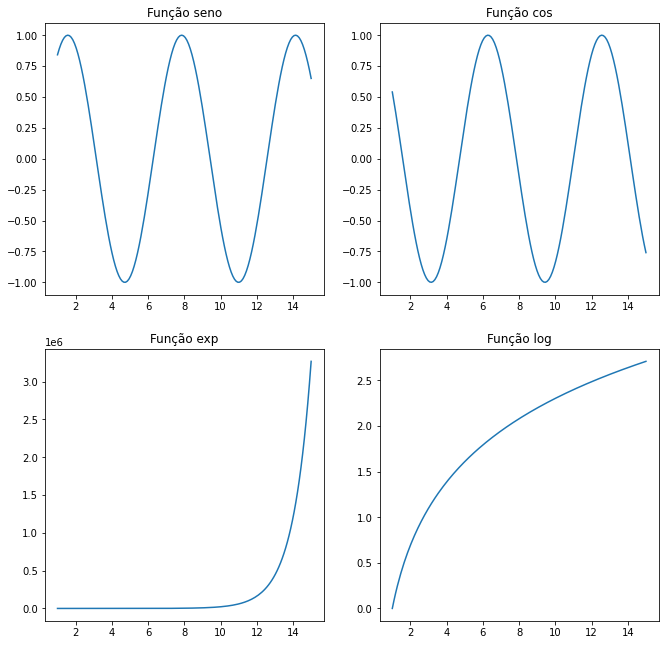

In [108]:
import matplotlib.pyplot as plt
titulos = ['Função seno','Função cos', 'Função exp', 'Função log']
plt.figure(figsize=(11, 11))
for index, funcao in enumerate(funcoes):
    plt.subplot(2,2, index+1)
    plt.plot(x, funcao)
    plt.title(titulos[index])

**Distância euclidiana**

A distância entre dois pontos (x1, y1), (x2,y2)!

![a](https://rosalind.info/media/Euclidean_distance.png)

## Monte Carlo Calculo de Pi

Imagine que você tenha um quadrado de lado 2. Dentro desse quadrado conseguimos inserir um circulo com raio 1.

Logo a área do quadrado é: $l^2 = (2*r)^2$  
E a área do circulo é: $\pi * r^2$  

Imagine que eu jogue 1000 agulhas aleatoriamente nesse quadrado.  
Quantas agulhas irão cair dentro do circulo?  
Quantas agulhas irão cair fora do circulo?

$P(agulha \ dentro) = ÁreaCirculo / AreaQuadrado$  
$P(agulha \ dentro) = \pi * r^2 / 4r^2$  
$P(agulha \ dentro) = \pi / 4$  
$\pi = (Dentro/Total) * 4$  


Construa um programa que simule o lançamento de $n$ agulhas (1000 por exemplo).  
Qual seria o valor de pi?  
E se fizermos essa simulação (Monte Carlo) muitas vezes(1, 10, 100, 1000, 10000)? Qual o valor de pi (média e desvio padrão)?  

distância <= 1 agulha dentro do círculo

e lembrando que:
$d^2 = x^2 + y^2$ ==> $d =  sqrt(x^2 + y^2)$

In [ ]:
%%time
import random

pis = []
n_sim = 10000
agulhas = 1000
for _ in range(n_sim):
    pontos_circulo = 0
    total = 0
    for i in range(agulhas):
        total +=1
        x = random.random()
        y = random.random()
        dist = (x**2 + y**2) ** 0.5
        if dist <= 1:
            pontos_circulo += 1
    pi = 4 * (pontos_circulo / total) 
    pis.append(pi)

In [ ]:
import seaborn as sns
sns.kdeplot(pis)